# Linear Regression and T Test with Boston Housing Data

The dataset used for the project comprises of housing data for suburbs in the city of Boston in the United States. The columns are as follows:

**crim**: per capita crime rate by town.
<br>
**zn**: proportion of residential land zoned for lots over 25,000 sq.ft.
<br>
**indus**: proportion of non-retail business acres per town.
<br>
**chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
<br>
**nox**: nitrogen oxides concentration (parts per 10 million).
<br>
**rm**: average number of rooms per dwelling.
<br>
**age**: proportion of owner-occupied units built prior to 1940.
<br>
**dis**: weighted mean of distances to five Boston employment centres.
<br>
**rad**: index of accessibility to radial highways.
<br>
**tax**: full-value property-tax rate per 10000 dollars.
<br>
**ptratio**: pupil-teacher ratio by town.
<br>
**b**: 1000(Bk - 0.63)^2 where Bk is the proportion of ethnic African-Americans by town.
<br>
**lstat**: lower status of the population (percent).
<br>
**medv**: median value of owner-occupied homes in 1000 dollar range.

In this project, we will be performing a linear regression on selected variables from this dataset (AGE and MEDV), as well as running a student t-test between the location of a tract in regards to the Charles River and whether or not that has any significant effect on the tract's median price.

### **Importing and Cleaning**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [4]:
df = pd.read_csv('housing2.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Column1
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN


In [5]:
# Dropping the extra column that contains no relevent information
df.drop(["Column1"], axis = 1, inplace = True)

In [6]:
# Finding the mean of the AGE column
df_mean = df.loc[:, 'AGE'].mean()
print('The average proportion of owner occupied units prior to 1940 is {:.02f}'.format(df_mean))

# Finding the standard deviation of the AGE column
df_std = df.loc[:, 'AGE'].std()
print('The standard deviation of the proportion of owner occupied units prior to 1940 is {:.02f}'.format(df_std))

The average proportion of owner occupied units prior to 1940 is 68.57
The standard deviation of the proportion of owner occupied units prior to 1940 is 28.15


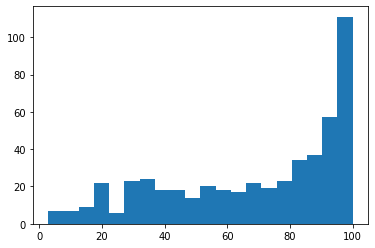

In [7]:
# Plotting histogram of AGE column, showing us that most of the data points lie in the higher range of 80 to 100
plt.hist(df['AGE'], bins=20)
plt.show()

In [8]:
# Finding sample correlation between AGE and MEDV
df_coeff = np.corrcoef(df['AGE'], df['MEDV'])
print(df_coeff)

[[ 1.         -0.37695457]
 [-0.37695457  1.        ]]


### Manually performing a Linear Regression

#### Null Hypothesis: H$_{0}$ : AGE and MEDV are not correlated

In [9]:
# Manually performing a regression of AGE against MEDV
x = df['AGE']
y = df['MEDV']
def estimate_coef(x, y):
    n = np.size(x)

    m_x = np.mean(x)
    m_y = np.mean(y)

    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return(b_0, b_1)

In [10]:
# Visualizing the regression with line of best fit (y_pred)
def plot_regression(x, y, b):
    plt.scatter(x, y, color="m", marker="o", s=30)
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color="g")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [11]:
def main():

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression(x, y, b)

Estimated coefficients:
b_0 = 30.978677762618307            
b_1 = -0.12316272123568321


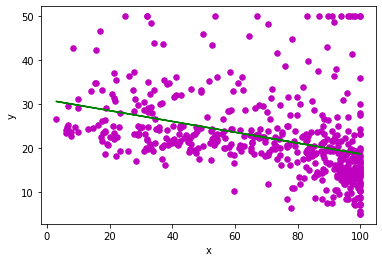

In [12]:
if __name__ == "__main__":
    main()

### Performing a Linear Regression using the sklearn model

In [18]:
# Converting the dataframe columns into numpy arrays, as well as reshaping them into 2D arrays for the regression model
a_n = (df['AGE'].to_numpy()).reshape(-1,1)
b_n = df['MEDV'].to_numpy().reshape(-1,1)

reg = LinearRegression().fit(a_n, b_n)

r_score = reg.score(a_n, b_n)
print("Coeffecient of determination of prediction is {:.02f}".format(r_score))

print("Estimated coeffecient(s) for linear regression are ", reg.coef_)

# Determing the p-value for our regression
est = sm.OLS(a_n,b_n)
est2 = est.fit()
p_values = est2.summary2()
print(p_values)

Coeffecient of determination of prediction is 0.14
Estimated coeffecient(s) for linear regression are  [[-0.12316272]]
                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.644    
Dependent Variable:     y                AIC:                         5272.1168
Date:                   2023-07-19 16:04 BIC:                         5276.3433
No. Observations:       506              Log-Likelihood:              -2635.1  
Df Model:               1                F-statistic:                 915.1    
Df Residuals:           505              Prob (F-statistic):          1.85e-115
R-squared (uncentered): 0.644            Scale:                       1957.4   
-------------------------------------------------------------------------------------
           Coef.        Std.Err.          t          P>|t|        [0.025       0.975]
-------------------------------------------------------------------------------------
x1     

With a significantly small p-value, we can confidentely reject the null hypothesis in favor of the the alternative, being that AGE and MEDV are correlated.

## Performing a T-test on CHAS and MEDV variables

### Null Hypothesis: H$_{0}$ : u$_{1}$ = u$_{2}$, where u$_{1}$ is median price of homes that do not border Charles River, and u$_{2}$ is median price of homes that do border the Charler River. 

If we are to accept the null hypothesis, we acknowledge that there is no price difference in the tracts that do and do not border the Charler River.

In [56]:
# Isolating the CHAS column from the rest of the dataset
groups = df.groupby('CHAS')

Now we split the CHAS column based on whether a tract borders the Charles River (1), or if it does not (0).

In [57]:
a = groups.get_group(0)
b = groups.get_group(1)

In [58]:
# Importing necessary packages to perform a T-test
import scipy as sp
import scipy.stats as st

Here we run a T-test on the MEDV values from both groups

In [67]:
ttest = st.ttest_ind(a['MEDV'],b['MEDV'])
print(ttest)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)


**T-statistic**: -3.996
<br>
**P-value**: .0000739. 

A non-zero T-statistic indicates that we have a deviation from the null hypothesis. 

With a p-value of less than 0.05, we can confidently reject the null hypothesis in favor of the alternative hypothesis that H$_{0}$: u$_{1}$ != u$_{2}$

In [68]:
st.t.interval(alpha=0.90, df=len(b['MEDV']), loc=np.mean(b['MEDV']), scale=st.sem(b['MEDV']))

(25.065286381188983, 31.814713618811016)

90% confidence interval for median price of tracts that border Charles River: (25.065, 31.815)

In [69]:
from statsmodels.stats.power import TTestIndPower

In [73]:
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=0.6, nobs1=None, alpha=0.05, power=0.8)

**Effect size**: Tells us how strong the difference between the groups is via their means.
<br>
**Alpha Value**: Type 1 error rate.
<br>
**Power Value**: Probability of avoiding a Type 2 error.
<br>


Given these parameters, we can calculate the appropriate sample size; which comes out to approximately 44.59

In [72]:
print(sample_size)

44.5857902590805
